The following notebook contains work from the previous task as it was instructed to carry on from it, please scroll down to T06 - Random Forests.

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [8]:
# Encode the other variables which will be selected
titanic_df = pd.get_dummies(titanic_df, prefix="Pclass", columns=["Pclass"])
titanic_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


In [9]:
titanic_df = pd.get_dummies(titanic_df, prefix="Survived", columns=["Survived"])
titanic_df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived_0,Survived_1
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1,0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0,0,1
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1,1,0


In [10]:
# Define the age group intervals and labels
age_intervals = [0, 18, 64, float('inf')]  # Represents [0-18 years, 19-64 years, 65+ years]
age_labels = ['0-18 years', '19-64 years', '65+ years']

# Create a new column 'Age_Group' based on the age intervals
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=age_intervals, labels=age_labels, right=False)

In [11]:
# Use pd.get_dummies() to perform label encoding on the 'Age_Group' column
age_dummies = pd.get_dummies(titanic_df['Age_Group'], prefix='Age_Group')


In [12]:
# Concatenate the new columns with the original DataFrame
titanic_df = pd.concat([titanic_df, age_dummies], axis=1)

titanic_df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived_0,Survived_1,Age_Group,Age_Group_0-18 years,Age_Group_19-64 years,Age_Group_65+ years
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,...,1,0,0,1,1,0,19-64 years,0,1,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,...,0,1,0,0,0,1,19-64 years,0,1,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,...,1,0,0,1,0,1,19-64 years,0,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,...,1,1,0,0,0,1,19-64 years,0,1,0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,...,1,0,0,1,1,0,19-64 years,0,1,0


In [13]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(titanic_df)

     PassengerId                                               Name   Age  \
0              1                            Braund, Mr. Owen Harris  22.0   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2              3                             Heikkinen, Miss. Laina  26.0   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4              5                           Allen, Mr. William Henry  35.0   
..           ...                                                ...   ...   
886          887                              Montvila, Rev. Juozas  27.0   
887          888                       Graham, Miss. Margaret Edith  19.0   
888          889           Johnston, Miss. Catherine Helen "Carrie"   NaN   
889          890                              Behr, Mr. Karl Howell  26.0   
890          891                                Dooley, Mr. Patrick  32.0   

     SibSp  Parch            Ticket     Fare  Sex_female  Sex_male  \
0    

In [14]:
# Select relevant variables for the model
selected_features = ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Pclass_1', 'Pclass_2', 'Pclass_3', 'Survived_0', 'Survived_1','Age_Group_0-18 years', 'Age_Group_19-64 years', 'Age_Group_65+ years']
titanic_df = titanic_df[selected_features].copy()

# Drop rows with missing values
titanic_df = titanic_df.dropna()

In [15]:
# Import other relevant modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [20]:
# Split the dataset into training, development, and test sets
train_dev, test = train_test_split(titanic_df, test_size=0.2, random_state=42)
train, dev = train_test_split(train_dev, test_size=0.2, random_state=42)

# Separate the features (x) and target variable (y)
X_train = train.drop('Survived_1', axis=1)
y_train = train['Survived_1']
X_dev = dev.drop('Survived_1', axis=1)
y_dev = dev['Survived_1']
X_test = test.drop('Survived_1', axis=1)
y_test = test['Survived_1']


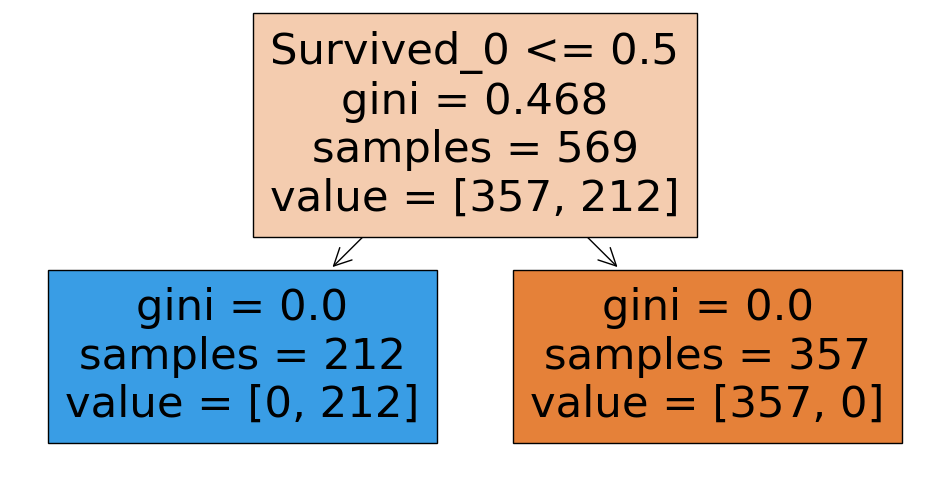

In [21]:
# Train a Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X_train.columns, filled=True)
plt.show()


In [22]:
# Make predictions on the development set
y_dev_pred = model.predict(X_dev)

# Compute accuracy on the development set
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print("Development Set Accuracy:", dev_accuracy)


Development Set Accuracy: 1.0


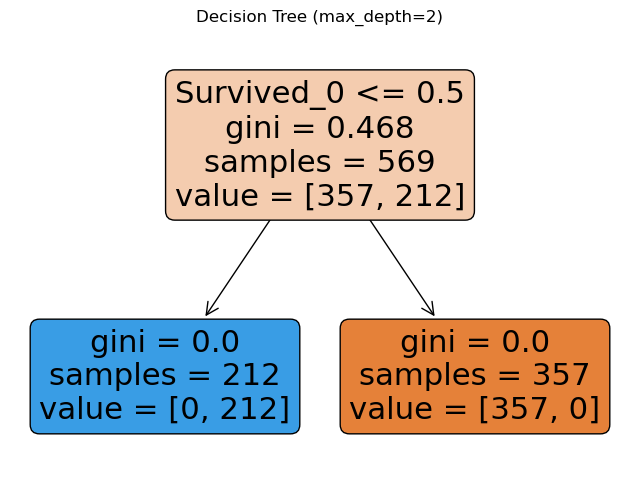

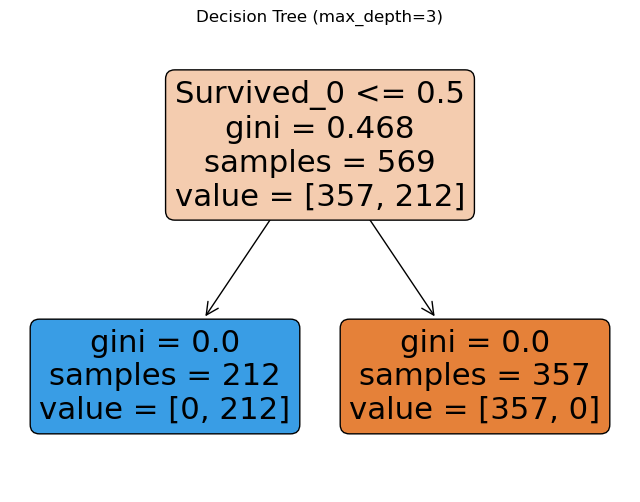

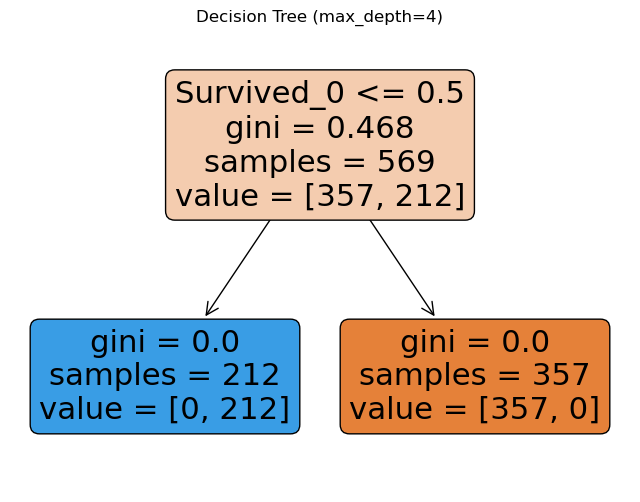

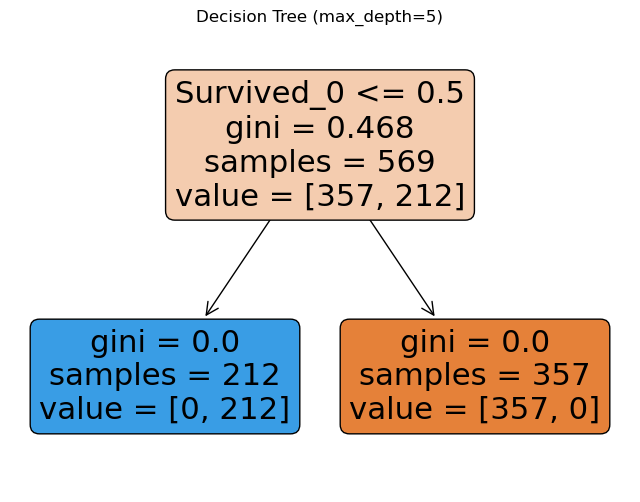

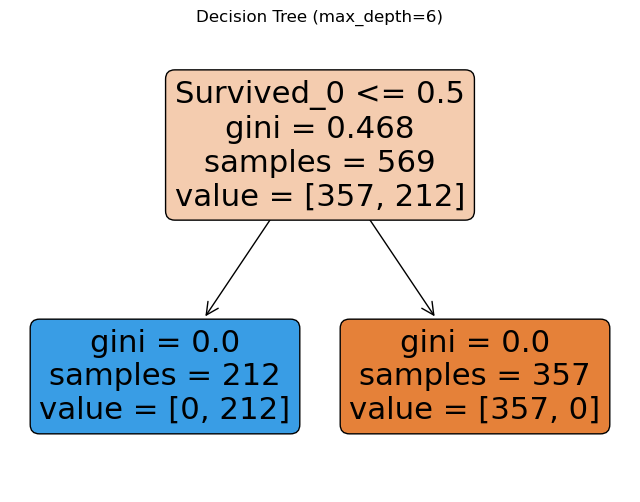

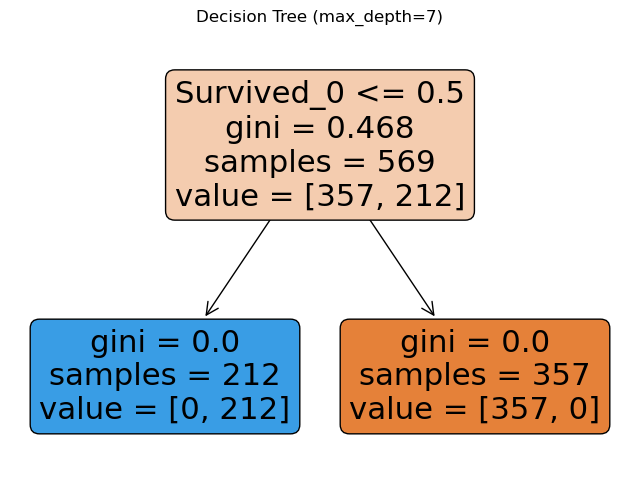

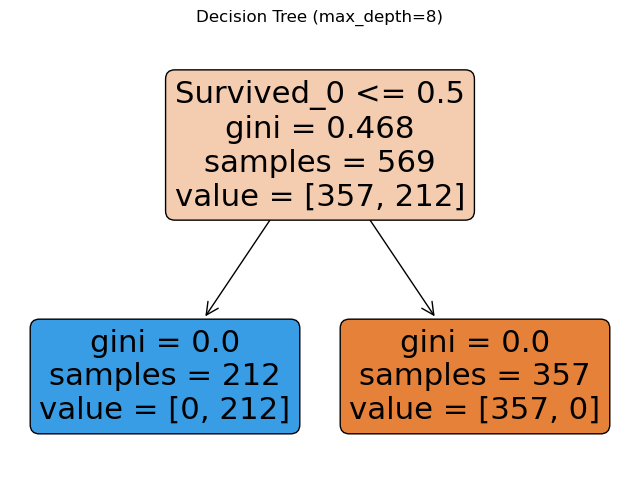

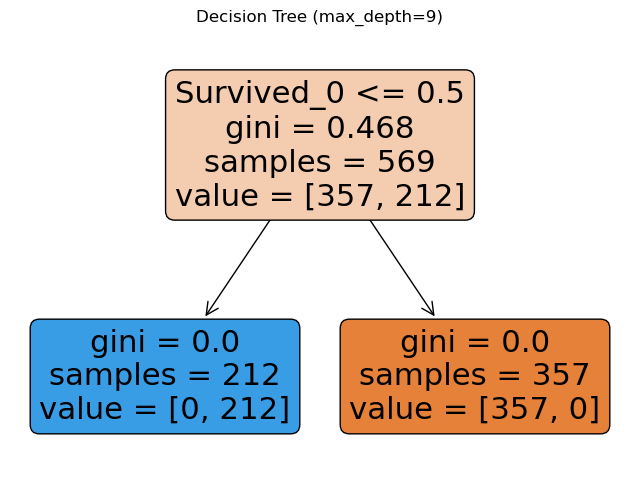

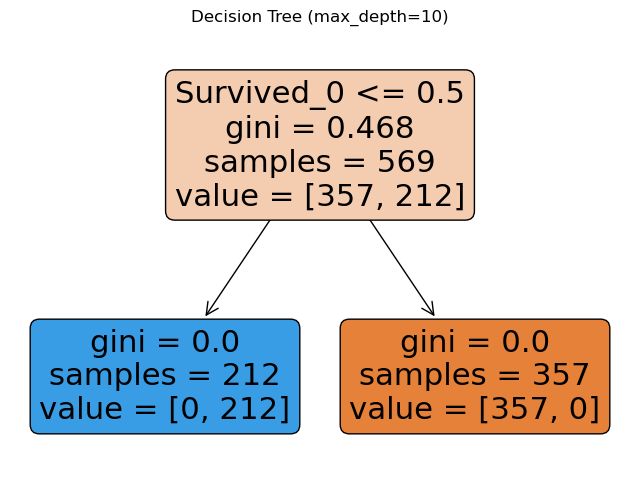

In [23]:
# Train a Decision Tree with different values of max_depth
max_depth_values = list(range(2, 11))
train_accuracies = []
dev_accuracies = []
final_test_accuracy = None
best_depth = None

for max_depth in max_depth_values:
    # Train a Decision Tree model with current max_depth
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Plot the Decision Tree
    plt.figure(figsize=(8, 6))
    plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree (max_depth={max_depth})")
    plt.show()
    
    # Compute accuracies on the training and development sets
    y_train_pred = model.predict(X_train)
    y_dev_pred = model.predict(X_dev)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)
    # Make predictions on the training and development sets
    y_train_pred = model.predict(X_train)
    y_dev_pred = model.predict(X_dev)
    

    # Keep track of the best model's max_depth and accuracy on the test data
    if final_test_accuracy is None or dev_accuracy > final_test_accuracy:
        final_test_accuracy = dev_accuracy
        best_depth = max_depth
    


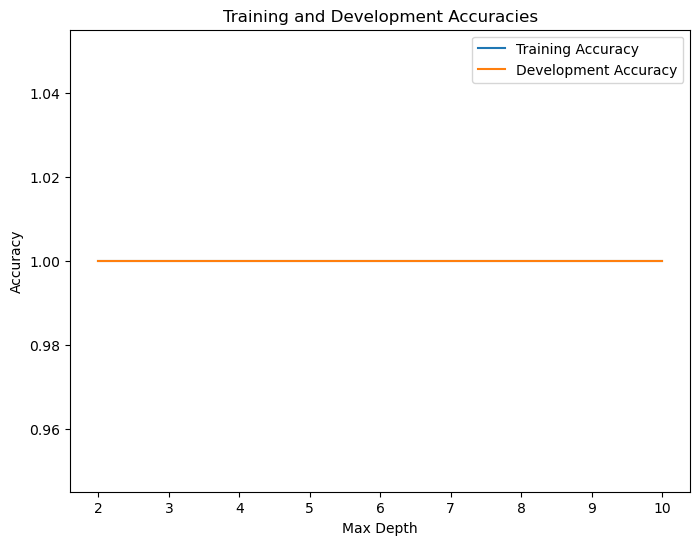

In [24]:
# Plot the training and development accuracies
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, dev_accuracies, label='Development Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies')
plt.legend()
plt.show()


In [25]:
# Make predictions on the test data using the final model
y_test_pred = model.predict(x_test)

# Compute the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", test_accuracy)


Test Set Accuracy: 1.0


T06 - Random Forests

In [26]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [27]:
# Create the models
bagged_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
boosted_tree = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)

# Fit the models on the training data
bagged_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
boosted_tree.fit(X_train, y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [28]:
# Get the feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)


                  Feature  Importance
8              Survived_0    0.746027
1                Sex_male    0.094207
0              Sex_female    0.074780
7                Pclass_3    0.025588
5                Pclass_1    0.021136
9    Age_Group_0-18 years    0.011838
6                Pclass_2    0.008660
10  Age_Group_19-64 years    0.005272
4              Embarked_S    0.005041
2              Embarked_C    0.004281
3              Embarked_Q    0.002911
11    Age_Group_65+ years    0.000259


In [29]:
# Define a list of values to try for n_estimators and max_depth
n_estimators_values = [50, 100, 150, 200]
max_depth_values = [None, 5, 10, 15]

best_accuracy = 0
best_n_estimators = None
best_max_depth = None

# Loop over all combinations of n_estimators and max_depth to find the best model
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# Print the best model parameters and accuracy
print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)
print("Best accuracy:", best_accuracy)


Best n_estimators: 50
Best max_depth: None
Best accuracy: 1.0


In [30]:
# Make predictions on the test set for all models
bagged_tree_pred = bagged_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
boosted_tree_pred = boosted_tree.predict(X_test)

# Compute the accuracy for all models
bagged_tree_accuracy = accuracy_score(y_test, bagged_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
boosted_tree_accuracy = accuracy_score(y_test, boosted_tree_pred)

# Print the accuracy of all models
print("Bagged Tree Accuracy:", bagged_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Boosted Tree Accuracy:", boosted_tree_accuracy)


Bagged Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Boosted Tree Accuracy: 1.0


All of the models have an accuracy of 1.0 (100%) which is the best accuracy, so each model is able to correctly predict the target variable (passenger survived or not) on the development set. This scenario is not common and could indicate a few potential issues:

Data Leakage - the models are unintentionally evaluated on the same data they were trained on, leading to less prudent results.

Overfitting - the models might be overfitting the training data, causing them to perform very well on the training and development sets (seen data) but badly on test set (unseen data).

Small Sample Size - the models might have memorized the data if the sample size is tiny, leading to artificially high accuracy.

To ensure the validity of the results, it's important to perform additional evaluations such as produsing a confusion matrix, cross-validation, precision, recall and f-1 score to understand moedel's performance as well as feature importance.